In [6]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
plot_list = []

for dataSetName in ["iris", "seeds", "wine", "thoracic_surgery", "diabetes_data"]:
    classifier_list = []
        
    print("=== Dataset ", dataSetName)

    # Préparation des données
    dataset_path = "../data/" + dataSetName + ".txt"
    if dataSetName == "iris" or dataSetName == "thoracic_surgery" or dataSetName == "diabetes_data":
        data = pd.read_csv(dataset_path, sep=";", header=None)
    else:
        data = pd.read_csv(dataset_path, sep=" ;", header=None)

    # Formatage des données
    X = data.iloc[0]

    if dataSetName == "iris":
        Y = data.iloc[2][0].split(",")
    else:
        Y = data.iloc[1][0].split(",")


    Y[0] = Y[0].replace('Y = [', ' ')
    Y[0] = Y[0].replace('Y=[', ' ')

    Y[0] = Y[0].replace('[', ' ')

    Y[-1] = Y[-1].replace(']', '')

    Y = [int(i) for i in Y]

    X = X.apply(lambda x: x.replace('X=[', ' '))
    X = X.apply(lambda x: x.replace('X = [', ' '))

    X = X.apply(lambda x: x.replace(' ]', ''))
    X = X.apply(lambda x: x.replace(']', ''))

    X = X.apply(lambda x: x.replace(' ', '', 1))
    X = X.apply(lambda x: x.split(' '))


    X = X.apply(lambda x: [float(i) for i in x])
    X = [item for item in X]

    # Apprentissage
    for D in [2, 3, 4]:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        for n_features in [1, None]:
            #classifier = DecisionTreeClassifier(max_depth=D, max_features=n_features, random_state=42)
            classifier = RandomForestClassifier(max_depth=D, max_features=n_features, random_state=42)
            classifier.fit(X_train, y_train)

            classifier_list.append(classifier)
            # Affichage de l'arbre
            #fig = plt.figure(figsize=(25,20))
            #tree.plot_tree(classifier,
            #                filled=True))


    plot_list.append(classifier_list)


=== Dataset  iris
=== Dataset  seeds


/var/folders/1r/4_b8pp1n4fng_jsy4zrk5dhh0000gn/T/ipykernel_1637/1043696187.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(dataset_path, sep=" ;", header=None)


=== Dataset  wine


/var/folders/1r/4_b8pp1n4fng_jsy4zrk5dhh0000gn/T/ipykernel_1637/1043696187.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(dataset_path, sep=" ;", header=None)


=== Dataset  thoracic_surgery
=== Dataset  diabetes_data


In [8]:
plot_list

[[RandomForestClassifier(max_depth=2, max_features=1, random_state=42),
  RandomForestClassifier(max_depth=2, max_features=None, random_state=42),
  RandomForestClassifier(max_depth=3, max_features=1, random_state=42),
  RandomForestClassifier(max_depth=3, max_features=None, random_state=42),
  RandomForestClassifier(max_depth=4, max_features=1, random_state=42),
  RandomForestClassifier(max_depth=4, max_features=None, random_state=42)],
 [RandomForestClassifier(max_depth=2, max_features=1, random_state=42),
  RandomForestClassifier(max_depth=2, max_features=None, random_state=42),
  RandomForestClassifier(max_depth=3, max_features=1, random_state=42),
  RandomForestClassifier(max_depth=3, max_features=None, random_state=42),
  RandomForestClassifier(max_depth=4, max_features=1, random_state=42),
  RandomForestClassifier(max_depth=4, max_features=None, random_state=42)],
 [RandomForestClassifier(max_depth=2, max_features=1, random_state=42),
  RandomForestClassifier(max_depth=2, max_fe

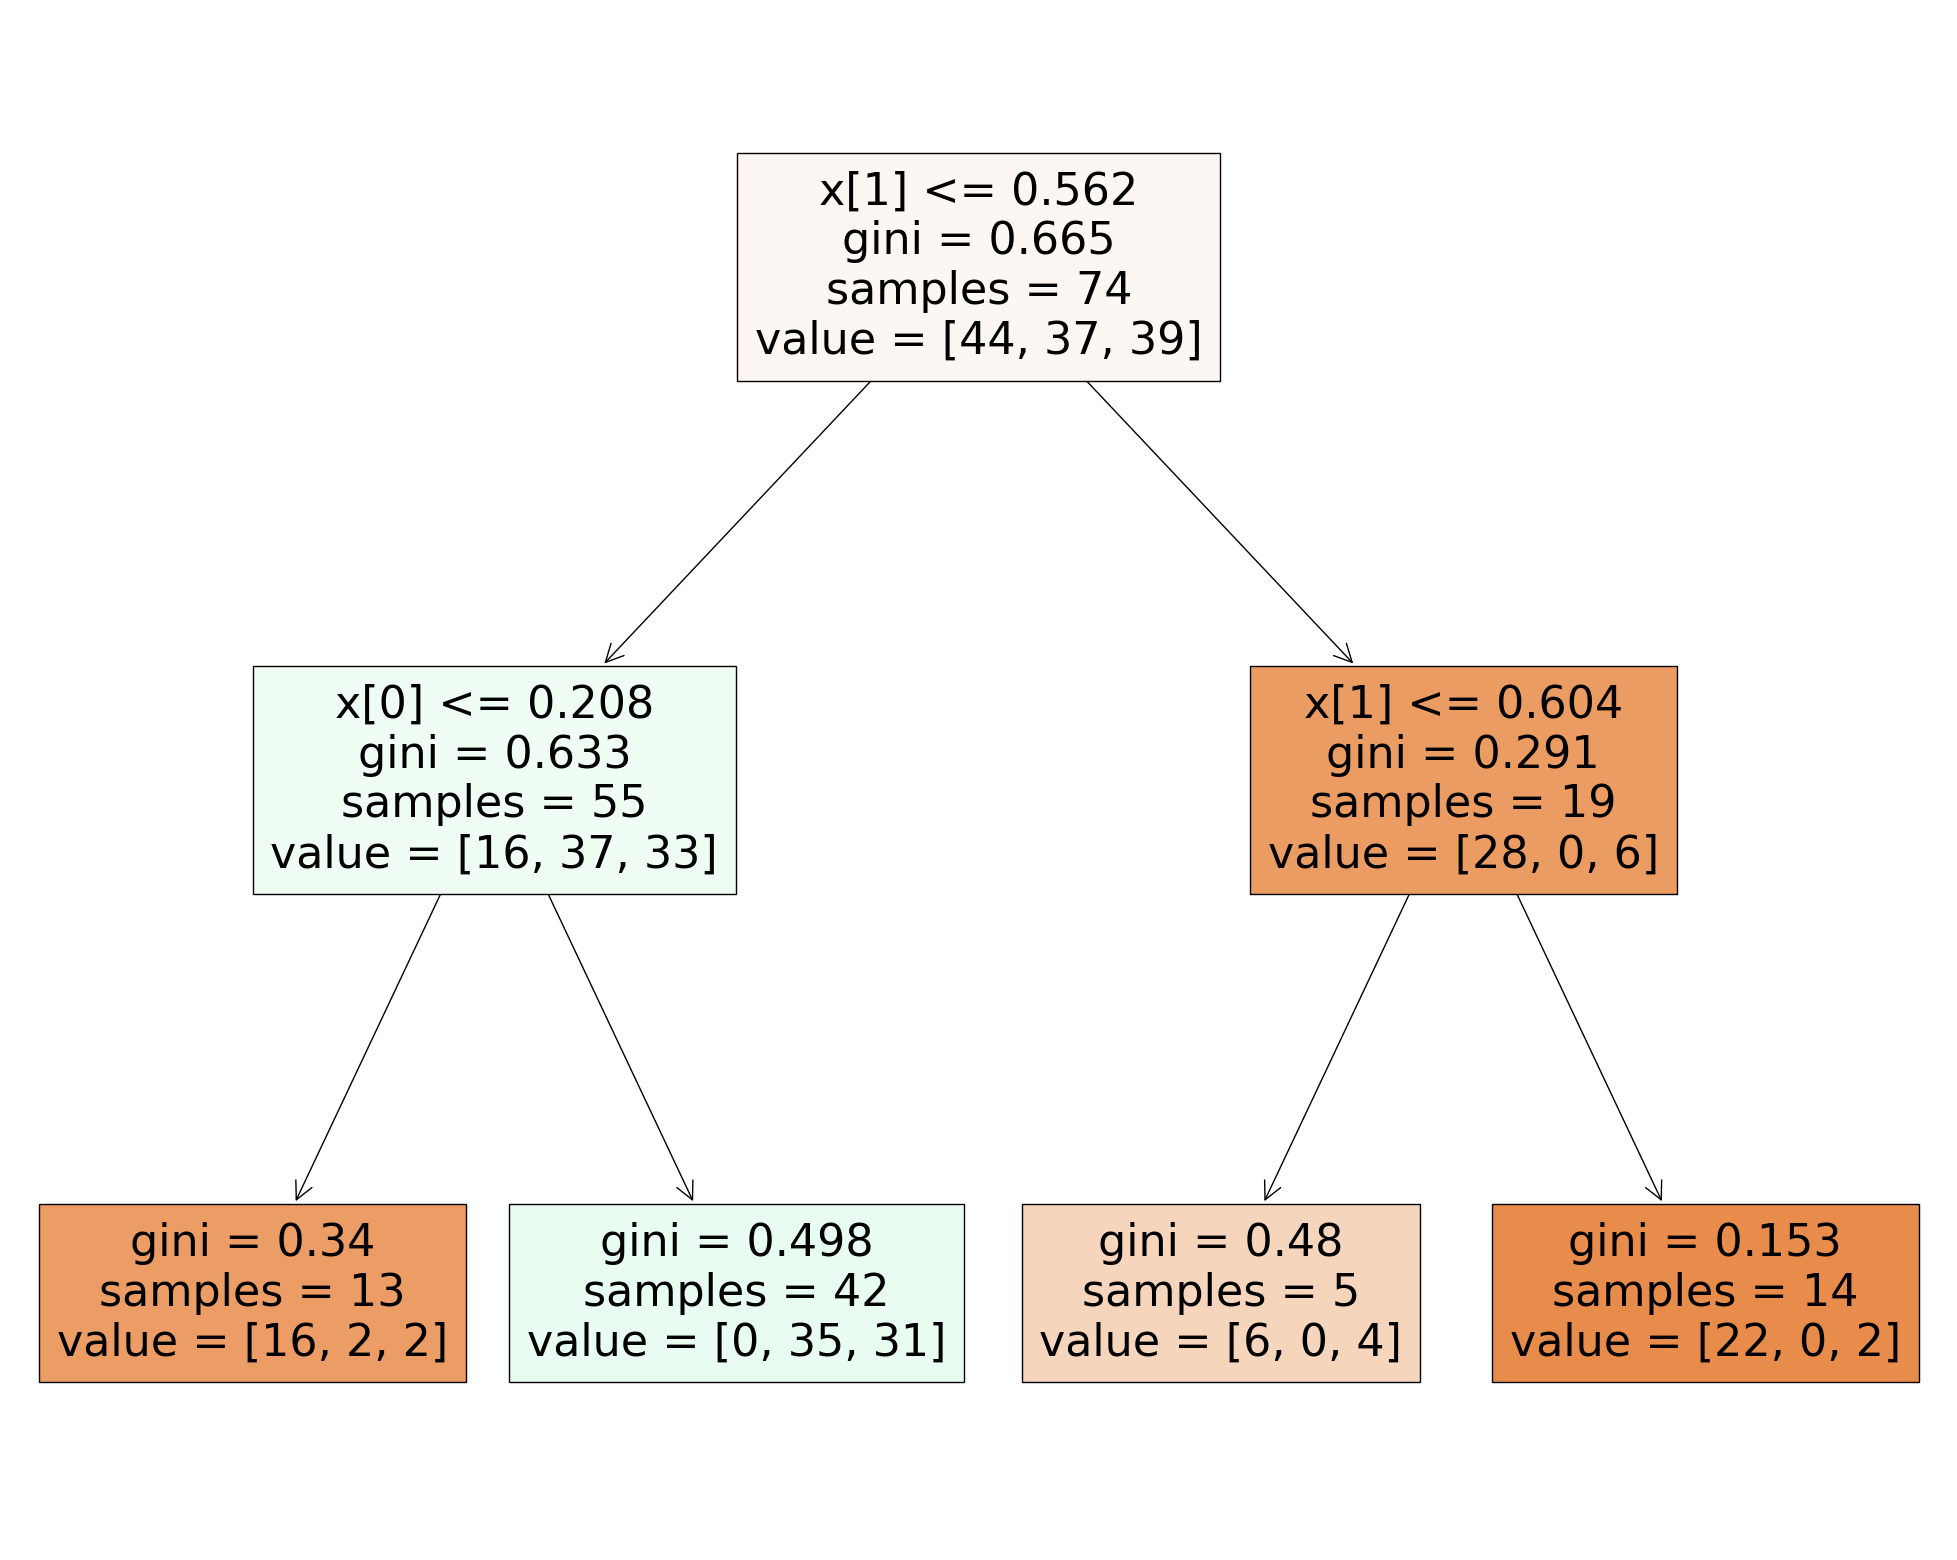

In [13]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(plot_list[0][0].estimators_[0], filled=True)
